<a href="https://colab.research.google.com/github/kunakl07/orcagsoc/blob/kunakl07-patch-1/vgg16_from_scratch_vs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip '/content/pcen_and_wavelet_test.zip'

Archive:  /content/pcen_and_wavelet_test.zip
   creating: content/Round2_OS_07_05/test/
   creating: content/Round2_OS_07_05/test/nocalls/
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg21_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg46_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg33_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg42_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg88_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg26_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg12_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg54_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg82_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg7_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg6_0000.png  
  inf

In [1]:
!unzip '/content/pcen_and_wavelet_trainsave.zip'

Archive:  /content/pcen_and_wavelet_trainsave.zip
   creating: content/Round2_OS_07_05/train/
   creating: content/Round2_OS_07_05/train/nocalls/
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333219_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333201_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333373_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod260_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod252_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2305_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod225_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333427_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2250_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2135_0000.png  
  inflating: content/Round2_OS_07_05/train/nocall

In [1]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications import ResNet152V2
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os


Using TensorFlow backend.


In [0]:
train_path='/content/content/Round2_OS_07_05/train'
test_path='/content/content/Round2_OS_07_05/test'

In [0]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['calls','nocalls'],batch_size=10)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'],batch_size=3)



Found 1570 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [0]:
test_batches2=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'],batch_size=201)


Found 201 images belonging to 2 classes.


In [0]:
import keras
vgg16_model=keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 39s 0us/step


In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)
for layer in model.layers:
  layer.trainable = True
#model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:

model.add(Dense(2, activation='softmax'))

In [0]:
opt = SGD(lr=1e-4, momentum=0.9)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [0]:
model.fit_generator(train_batches,steps_per_epoch=157,epochs=250,verbose=2)
model.save('True_layers_PCEN_VGG_Srkw.h5')
#from google.colab import files
#files.download('/content/PCEN_VGG_Srkw.h5.h5') 

Epoch 1/250
 - 71s - loss: 0.4492 - accuracy: 0.8089
Epoch 2/250
 - 62s - loss: 0.2882 - accuracy: 0.8962
Epoch 3/250
 - 62s - loss: 0.2136 - accuracy: 0.9268
Epoch 4/250
 - 62s - loss: 0.1812 - accuracy: 0.9318
Epoch 5/250
 - 62s - loss: 0.1297 - accuracy: 0.9586
Epoch 6/250
 - 62s - loss: 0.1170 - accuracy: 0.9586
Epoch 7/250
 - 62s - loss: 0.0818 - accuracy: 0.9726
Epoch 8/250
 - 62s - loss: 0.0723 - accuracy: 0.9790
Epoch 9/250
 - 62s - loss: 0.0506 - accuracy: 0.9834
Epoch 10/250
 - 62s - loss: 0.0348 - accuracy: 0.9885
Epoch 11/250
 - 62s - loss: 0.0115 - accuracy: 0.9975
Epoch 12/250
 - 62s - loss: 0.0077 - accuracy: 0.9987
Epoch 13/250
 - 62s - loss: 0.0023 - accuracy: 1.0000
Epoch 14/250
 - 62s - loss: 0.0014 - accuracy: 1.0000
Epoch 15/250
 - 62s - loss: 9.8710e-04 - accuracy: 1.0000
Epoch 16/250
 - 62s - loss: 8.1219e-04 - accuracy: 1.0000
Epoch 17/250
 - 62s - loss: 6.9740e-04 - accuracy: 1.0000
Epoch 18/250
 - 62s - loss: 5.9198e-04 - accuracy: 1.0000
Epoch 19/250
 - 62s -

KeyboardInterrupt: ignored

In [0]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(25,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

test_imgs, test_labels = next(test_batches2)

# we plot these samples of images and their labels 1 batch at a time.
plots(test_imgs, titles=test_labels)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
import matplotlib.pyplot as plt


In [0]:
%matplotlib inline


In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion_matrix',cmap=plt.cm.Blues
):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes)
  plt.yticks(tick_marks,classes)

  print(cm)
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j], horizontalalignment="center",color='white' if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [0]:
predictions=model.predict_generator(test_batches,steps=67,verbose=0)

In [0]:
np.round(predictions[:,0])

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [0]:
test_labels2

array([1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

In [0]:
np.argmax(predictions)

7

In [0]:
predictions.shape

(201, 2)

In [0]:
test_labels.shape

(201, 2)

In [0]:

test_imgs2, test_labels2 = next(test_batches2)

# we plot these samples of images and their labels 1 batch at a time.
plots(test_imgs2, titles=test_labels2)

In [0]:
test_labels2=test_labels2[:,0]


In [0]:
test_labels2.size

201

In [0]:
cm=confusion_matrix(test_labels2,np.round(predictions[:,0]))

In [0]:
cm_plot_labels=['calls','nocalls']

In [0]:
import itertools

[[43 57]
 [55 46]]


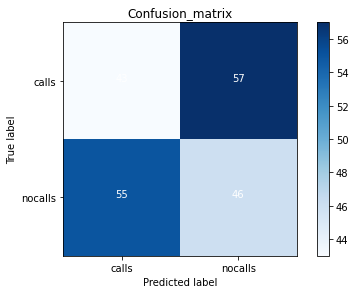

In [0]:
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

#Xception

In [0]:
import keras
xception_model=keras.applications.xception.Xception()


91889664/91884032 [==============================] - 8s 0us/step


In [0]:
xception_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [0]:
model2 = Sequential()
for layer in xception_model.layers[:-1]: # just exclude last layer from copying
  model2.add(layer)
for layer in model.layers:
  layer.trainable = True
model.add(Dense(2, activation='softmax'))
model2.summary()

ValueError: ignored

In [0]:
mobile_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
mobile_model = keras.applications.mobilenet_v2.MobileNetV2()


#Basic CNN model

In [4]:
import os

train_data_path = '/content/content/Round2_OS_07_05/train/'
test_data_path = '/content/content/Round2_OS_07_05/test/'

#Parametres
img_width, img_height = 607, 617

nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))
print(nb_train_samples)
epochs = 100
batch_size = 157



1570


In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# K.set_image_dim_ordering('th')

model = Sequential()
model.add(Conv2D(64, (5, 5), padding = 'same', strides=3, input_shape=input_shape))
# model.add(Conv2D(32, (5, 5), padding = 'same', strides=2))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (5, 5),  strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 203, 206, 64)      4864      
_________________________________________________________________
activation_1 (Activation)    (None, 203, 206, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 203, 206, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 68, 69, 64)        102464    
_________________________________________________________________
activation_2 (Activation)    (None, 68, 69, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       204928    
_________________________________________________________________
activation_3 (Activation)    (None, 23, 23, 128)      

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

In [0]:

train_datagen = ImageDataGenerator(rescale=1. / 255)


test_datagen = ImageDataGenerator(rescale=1. / 255)

train_batchsize = 157

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)



history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    
    )

model.save('srkw.h5')

Found 1570 images belonging to 2 classes.
Epoch 1/50


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=250,
    
    )


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=150,
    
    )


Epoch 1/150
10/10 [==============================] - 18s 2s/step - loss: 0.5160 - accuracy: 0.7350
Epoch 2/150
10/10 [==============================] - 18s 2s/step - loss: 0.5111 - accuracy: 0.7420
Epoch 3/150
10/10 [==============================] - 18s 2s/step - loss: 0.5083 - accuracy: 0.7567
Epoch 4/150
10/10 [==============================] - 18s 2s/step - loss: 0.5120 - accuracy: 0.7408
Epoch 5/150
10/10 [==============================] - 18s 2s/step - loss: 0.5161 - accuracy: 0.7401
Epoch 6/150
10/10 [==============================] - 18s 2s/step - loss: 0.5112 - accuracy: 0.7503
Epoch 7/150
10/10 [==============================] - 17s 2s/step - loss: 0.5068 - accuracy: 0.7529
Epoch 8/150
10/10 [==============================] - 17s 2s/step - loss: 0.5148 - accuracy: 0.7459
Epoch 9/150
10/10 [==============================] - 17s 2s/step - loss: 0.5167 - accuracy: 0.7401
Epoch 10/150
10/10 [==============================] - 17s 2s/step - loss: 0.5100 - accuracy: 0.7433
Epoch 11/

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np


test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_path,
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predictions[predictions<=0.5] = 0
predictions[predictions>0.5] = 1

predicted_classes = (predictions).astype(np.int)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Found 201 images belonging to 2 classes.
              precision    recall  f1-score   support

       calls       0.94      0.75      0.84       101
     nocalls       0.79      0.95      0.86       100

    accuracy                           0.85       201
   macro avg       0.86      0.85      0.85       201
weighted avg       0.87      0.85      0.85       201

[[76 25]
 [ 5 95]]
acc: 0.8507
sensitivity: 0.7525
specificity: 0.9500


#After this I have just performed some experiments. You could skip the part after this!!

In [10]:
import os

train_data_path = '/content/content/Round2_OS_07_05/train/'
test_data_path = '/content/content/Round2_OS_07_05/test/'

#Parametres
img_width, img_height = 607, 617

nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))
print(nb_train_samples)
epochs = 100
batch_size = 157



1570


In [23]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(64, (5, 5), padding = 'same', strides=3, input_shape=input_shape))
# model.add(Conv2D(32, (5, 5), padding = 'same', strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))


model.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (5, 5),  strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))


model.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 203, 206, 64)      4864      
_________________________________________________________________
activation_10 (Activation)   (None, 203, 206, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 203, 206, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 68, 69, 64)        102464    
_________________________________________________________________
activation_11 (Activation)   (None, 68, 69, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 64)        102464    
_________________________________________________________________
activation_12 (Activation)   (None, 23, 23, 64)       

In [11]:

train_datagen = ImageDataGenerator(rescale=1. / 255)


test_datagen = ImageDataGenerator(rescale=1. / 255)

# Change the batchsize according to your system RAM
train_batchsize = 157

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)


# validation_generator.reset()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=550,
    
    )

# model.save_weights('orca_detection_3.h5')
model.save('srkw.h5')

Found 1570 images belonging to 2 classes.
Epoch 1/550
10/10 [==============================] - 21s 2s/step - loss: 0.6931 - accuracy: 0.5166
Epoch 2/550
10/10 [==============================] - 17s 2s/step - loss: 0.6932 - accuracy: 0.4968
Epoch 3/550
10/10 [==============================] - 17s 2s/step - loss: 0.6931 - accuracy: 0.5096
Epoch 4/550
10/10 [==============================] - 17s 2s/step - loss: 0.6931 - accuracy: 0.5172
Epoch 5/550
10/10 [==============================] - 17s 2s/step - loss: 0.6932 - accuracy: 0.4955
Epoch 6/550
10/10 [==============================] - 17s 2s/step - loss: 0.6931 - accuracy: 0.5127
Epoch 7/550
10/10 [==============================] - 17s 2s/step - loss: 0.6931 - accuracy: 0.5096
Epoch 8/550
10/10 [==============================] - 17s 2s/step - loss: 0.6931 - accuracy: 0.5108
Epoch 9/550
10/10 [==============================] - 17s 2s/step - loss: 0.6932 - accuracy: 0.4822
Epoch 10/550
10/10 [==============================] - 17s 2s/step -

KeyboardInterrupt: ignored

In [5]:

train_datagen = ImageDataGenerator(rescale=1. / 255)


test_datagen = ImageDataGenerator(rescale=1. / 255)

# Change the batchsize according to your system RAM
train_batchsize = 157

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)
'''

# validation_generator.reset()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=550,
    
    )

# model.save_weights('orca_detection_3.h5')
model.save('srkw.h5') '''

Found 1570 images belonging to 2 classes.


"\n\n# validation_generator.reset()\n\nhistory = model.fit_generator(\n    train_generator,\n    steps_per_epoch=nb_train_samples // batch_size,\n    epochs=550,\n    \n    )\n\n# model.save_weights('orca_detection_3.h5')\nmodel.save('srkw.h5') "

In [14]:
 pip install --ignore-installed tf-nightly

     |████████████████████████████████| 350.2MB 52kB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 3.0MB 48.9MB/s 
     |████████████████████████████████| 3.0MB 41.4MB/s 
     |████████████████████████████████| 2.9MB 42.7MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 1.3MB 57.2MB/s 
     |████████████████████████████████| 112kB 56.6MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 26.1MB 89kB/s 
     |████████████████████████████████| 460kB 56.0MB/s 
     |████████████████████████████████| 307kB 41.3MB/s 
     |████████████████████████████████| 583kB 45.4MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 778kB 47.7MB/s 
  

In [18]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

No known TensorBoard instances running.


In [0]:
import tensorboard

#Using Keras Tuner, trying to find the Best model

In [6]:
!pip install keras-tuner

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [8]:
print(tf.__version__)

2.3.0-dev20200615


In [0]:
import cv2

In [10]:
img=cv2.imread('/content/content/Round2_OS_07_05/train/calls/calls100_0000.png')
img.shape

(607, 617, 3)

In [0]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(607,617,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax'),
        keras.layers.Dense(2, activation='softmax')

  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-4])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  return model

In [0]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [14]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="SRKW")

INFO:tensorflow:Reloading Oracle from existing project output/SRKW/oracle.json


In [0]:
tuner_search.search(epochs=3,validation_split=0.1)